<a href="https://colab.research.google.com/github/sreyeshkonduru/sreyesh_INFO5731_Fall2024/blob/main/KONDURU_SREYESH_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from collections import defaultdict, Counter
import re

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/5731 files/cleaned_data.csv')

# Preprocess text by tokenizing
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Count the frequency of all the N-grams (N=3).
def n_gram_frequency(texts):
    trigram_counts = Counter()
    for text in texts:
        tokens = tokenize(text)
        for i in range(len(tokens) - 2):
            trigram = (tokens[i], tokens[i+1], tokens[i+2])
            trigram_counts[trigram] += 1
    return trigram_counts

# Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.
def bigram_probabilities(texts):
    bigram_counts = Counter()
    unigram_counts = Counter()
    bigram_probs = defaultdict(float)

    for text in texts:
        tokens = tokenize(text)
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i+1])
            unigram = tokens[i]
            bigram_counts[bigram] += 1
            unigram_counts[unigram] += 1

    for (w1, w2), count in bigram_counts.items():
        if unigram_counts[w1] > 0:
            bigram_probs[(w1, w2)] = count / unigram_counts[w1]
    return bigram_probs

# Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.
def extract_noun_phrases(texts):
    all_noun_phrases_counts = Counter()
    review_noun_phrases = []

    def extract_nouns(tokens):
        return [token for token in tokens if re.match(r'\b\w+\b', token)]

    for text in texts:
        tokens = tokenize(text)
        nouns = extract_nouns(tokens)
        review_noun_phrases.append(nouns)
        all_noun_phrases_counts.update(nouns)

    return review_noun_phrases, all_noun_phrases_counts

def calculate_relative_probabilities(review_noun_phrases, all_noun_phrases_counts):
    max_freq = max(all_noun_phrases_counts.values())
    relative_probs = []

    for nouns in review_noun_phrases:
        review_probs = {np: count / max_freq for np, count in Counter(nouns).items()}
        relative_probs.append(review_probs)

    return relative_probs

# Perform the calculations
texts = data['Abstract'].tolist()

# Trigram frequency
trigram_counts = n_gram_frequency(texts)
print("Trigram Frequencies:\n", trigram_counts)

# Bigram probabilities
bigram_probs = bigram_probabilities(texts)
print("\nBigram Probabilities:\n", bigram_probs)

# Noun phrase extraction and relative probabilities
review_noun_phrases, noun_phrase_counts = extract_noun_phrases(texts)
relative_probs = calculate_relative_probabilities(review_noun_phrases, noun_phrase_counts)

# Display result as a table with noun phrases as columns and reviews as rows
relative_probs_df = pd.DataFrame(relative_probs).fillna(0)
print("Relative Probabilities of Noun Phrases:")
print(relative_probs_df)


Trigram Frequencies:
 Counter({('machin', 'learn', 'algorithm'): 130, ('support', 'vector', 'machin'): 123, ('machin', 'learn', 'model'): 95, ('machin', 'learn', 'techniqu'): 67, ('machin', 'learn', 'method'): 64, ('use', 'machin', 'learn'): 44, ('machin', 'learn', 'ml'): 42, ('deep', 'neural', 'network'): 39, ('machin', 'learn', 'approach'): 39, ('machin', 'learn', 'system'): 38, ('vector', 'machin', 'svm'): 33, ('applic', 'machin', 'learn'): 33, ('field', 'machin', 'learn'): 32, ('convolut', 'neural', 'network'): 28, ('artifici', 'neural', 'network'): 28, ('machin', 'learn', 'research'): 27, ('natur', 'languag', 'process'): 26, ('tradit', 'machin', 'learn'): 23, ('appli', 'machin', 'learn'): 23, ('machin', 'learn', 'applic'): 22, ('machin', 'learn', 'data'): 22, ('problem', 'machin', 'learn'): 19, ('machin', 'learn', 'problem'): 19, ('machin', 'learn', 'commun'): 16, ('mani', 'machin', 'learn'): 16, ('learn', 'data', 'mine'): 16, ('learn', 'deep', 'learn'): 15, ('statist', 'machin', 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import re
from math import log, sqrt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/5731 files/cleaned_data.csv')
documents = data['Abstract'].tolist()

# tokenizing data
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Calculate term frequencies (TF)
def calculate_tf(documents):
    tf_scores = []
    for doc in documents:
        tokens = tokenize(doc)
        total_terms = len(tokens)
        term_counts = {}
        for term in tokens:
            term_counts[term] = term_counts.get(term, 0) + 1
        tf = {term: count / total_terms for term, count in term_counts.items()}
        tf_scores.append(tf)
    return tf_scores

# Calculate inverse document frequency (IDF)
def calculate_idf(documents):
    total_docs = len(documents)
    idf_scores = {}
    for doc in documents:
        unique_terms = set(tokenize(doc))
        for term in unique_terms:
            idf_scores[term] = idf_scores.get(term, 0) + 1
    idf = {term: log(total_docs / doc_freq) for term, doc_freq in idf_scores.items()}
    return idf

# Calculate TF-IDF for each document
def calculate_tfidf(tf_scores, idf_scores):
    tf_idf_matrix = []
    for tf in tf_scores:
        tf_idf = {term: tf.get(term, 0) * idf_scores.get(term, 0) for term in idf_scores}
        tf_idf_matrix.append(tf_idf)
    return tf_idf_matrix

# Create a query vector in the TF-IDF space
def create_query_vector(query, idf_scores):
    query_tokens = tokenize(query)
    total_terms = len(query_tokens)
    query_tf = {}
    for term in query_tokens:
        query_tf[term] = query_tf.get(term, 0) + 1
    query_tf = {term: count / total_terms for term, count in query_tf.items()}
    query_tf_idf = {term: query_tf.get(term, 0) * idf_scores.get(term, 0) for term in idf_scores}
    return query_tf_idf

# Calculate cosine similarity between query and document vectors
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1[term] * vec2.get(term, 0) for term in vec1)
    magnitude1 = sqrt(sum(value ** 2 for value in vec1.values()))
    magnitude2 = sqrt(sum(value ** 2 for value in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0.0
    return dot_product / (magnitude1 * magnitude2)

# Rank documents based on cosine similarity with query
def rank_documents(tf_idf_matrix, query_vector):
    similarities = []
    for i, doc_vector in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(query_vector, doc_vector)
        similarities.append((i, similarity))
    ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    return ranked_docs

# Calculate TF and IDF scores
tf_scores = calculate_tf(documents)
idf_scores = calculate_idf(documents)

# Calculate the TF-IDF matrix
tf_idf_matrix = calculate_tfidf(tf_scores, idf_scores)
tf_idf_df = pd.DataFrame(tf_idf_matrix).fillna(0)
tf_idf_df.columns = idf_scores.keys()

# Display the TF-IDF matrix
print("Documents-Terms Weights (TF-IDF) Matrix:\n\n")
print(tf_idf_df)

query = "I am sreyesh varma and I tend to be a Data Scientist"
query_vector = create_query_vector(query, idf_scores)

# Step 4: Rank the documents based on cosine similarity with the query
ranked_documents = rank_documents(tf_idf_matrix, query_vector)

# Display the ranking results
print("\nRanking of Documents with Respect to the Query:")
for rank, (doc_index, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Document {doc_index} with Similarity {similarity:.4f}")


Documents-Terms Weights (TF-IDF) Matrix:


        split  categori     avail       per       set      http     mnist  \
0    0.096034  0.143582  0.045015  0.089258  0.054461  0.096034  0.084127   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.020948  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
725  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
726  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
727  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.046517   
728  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
729  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     grayscal      test    direc

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Vocabulary Size: 5801
Enter a word: data
Word vector for 'data': [0.02902821 0.46548727 0.16975302 0.30617794 0.0658648 ]...


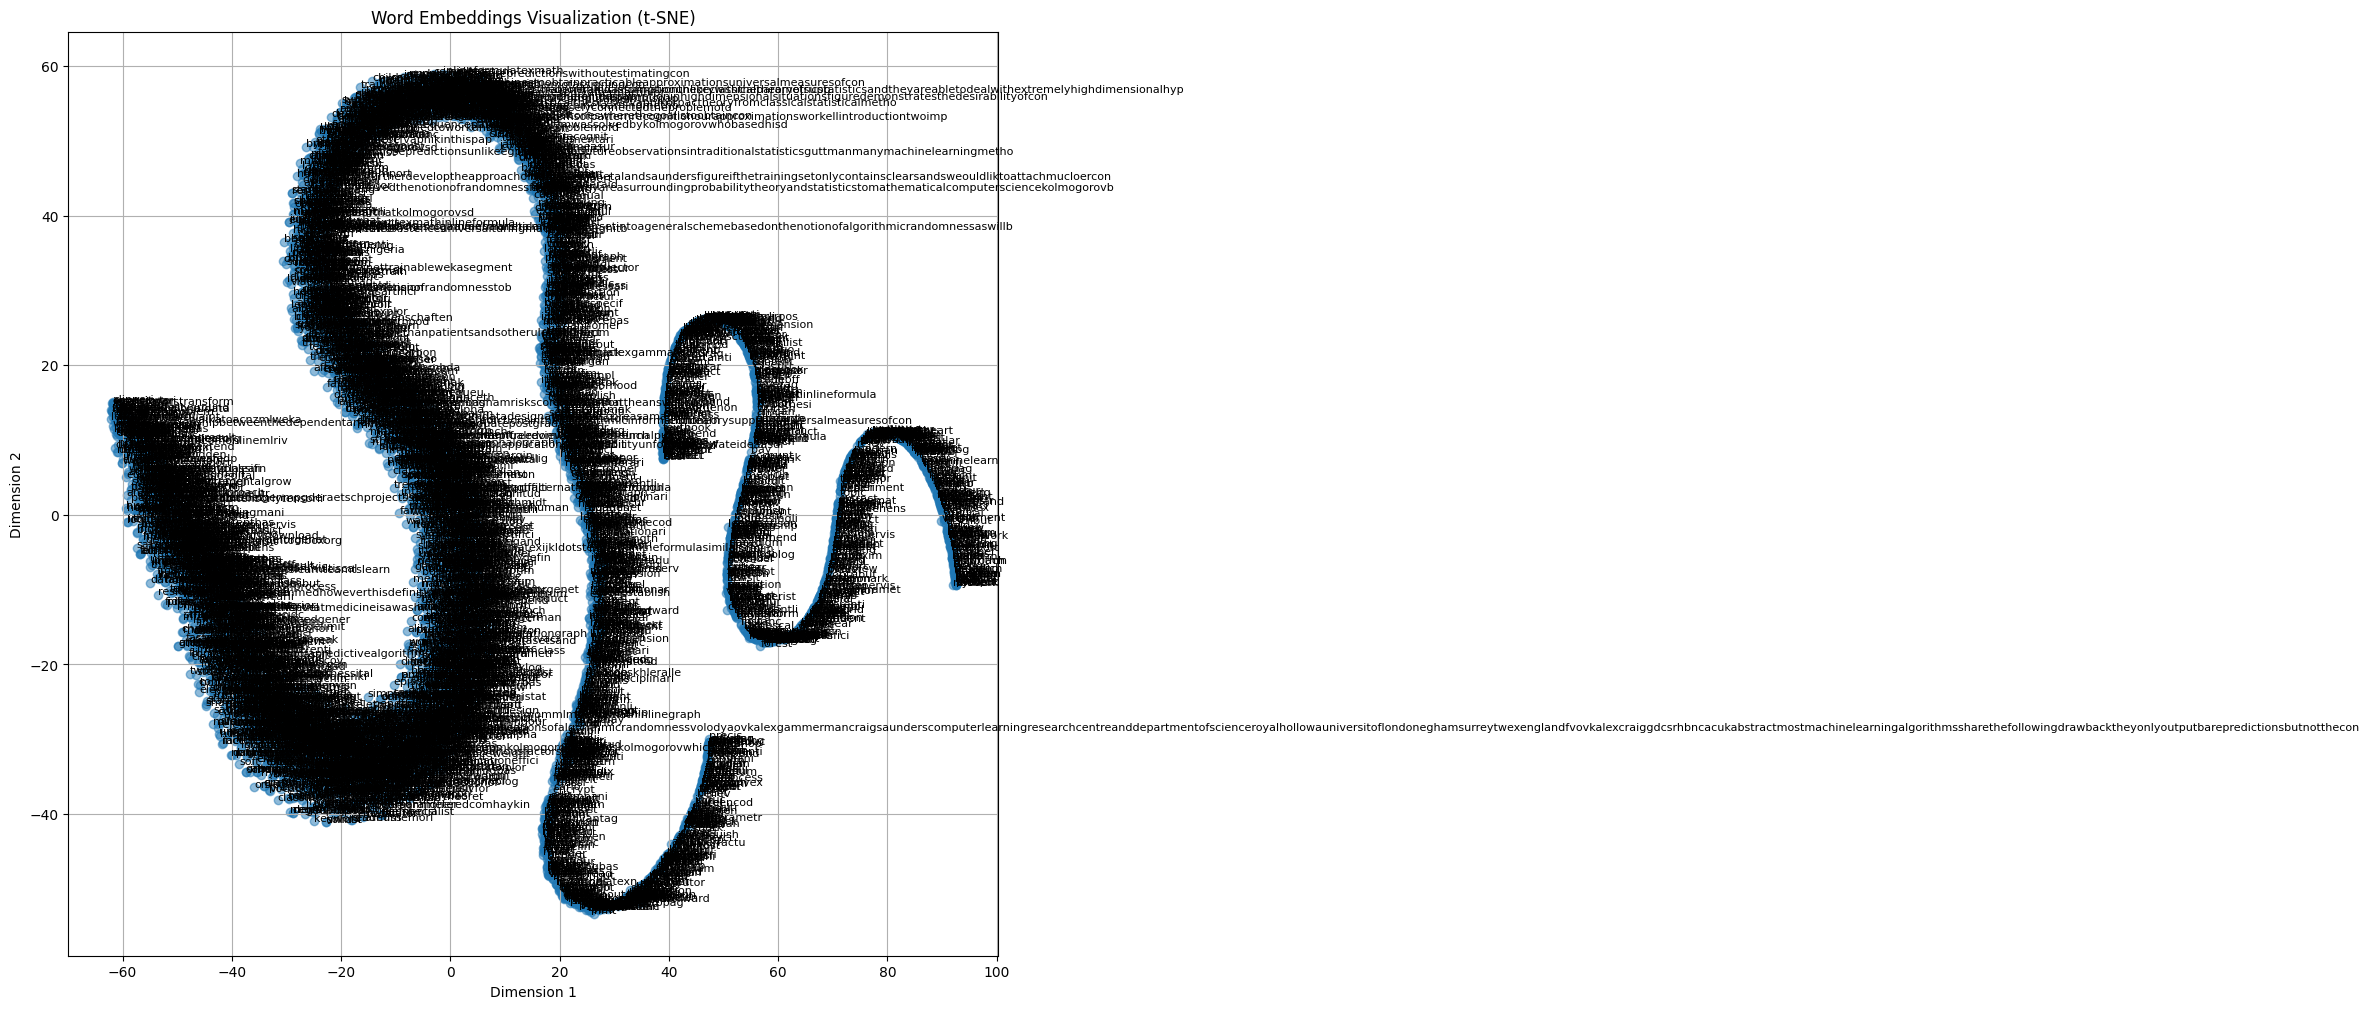

In [ ]:
# Write your code here
import pandas as pd
import re
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
import numpy as np
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/5731 files/cleaned_data.csv')
documents = data['Abstract'].tolist()

# Preprocess text by tokenizing and removing non-alphabetic tokens
def tokenizer(text):
    text = re.sub(r'[^A-Za-z\s]', '', text.lower())
    return word_tokenize(text)

tokenized_docs = [tokenizer(doc) for doc in documents]

# Training a 300-dimension word embedding
model = Word2Vec(sentences=tokenized_docs, vector_size=300, window=5, min_count=1, sg=0, workers=4)
model.save("word2vec_model_300d.model")

# Check the vocabulary
vocabulary = model.wv.index_to_key
print("Vocabulary Size:", len(vocabulary))

# Accessing the vector for a word
word_to_check = input("Enter a word: ")
if word_to_check in model.wv:
    word_vector = model.wv[word_to_check]
    print(f"Word vector for '{word_to_check}': {word_vector[:5]}...")
else:
    print(f"'{word_to_check}' is not present in the vocabulary.")

# Extract the word vectors for visualization
word_vectors = np.array([model.wv[word] for word in vocabulary])

# Use t-SNE to reduce the dimensionality of the word vectors to 2D for visualization
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a DataFrame for visualization
df = pd.DataFrame(word_vectors_2d, columns=['x', 'y'])
df['word'] = vocabulary

# Visualize the word embedding model you created.
plt.figure(figsize=(12, 12))
plt.scatter(df['x'], df['y'], alpha=0.5)

# Annotate points with the corresponding words
for i, word in enumerate(df['word']):
    plt.annotate(word, (df['x'][i], df['y'][i]), fontsize=8)

plt.title("Word Embeddings Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
# Link:
'''https://github.com/sreyeshkonduru/sreyesh_INFO5731_Fall2024/blob/main/annotated_sentiment_data_final.csv'''

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''I found it hard to rank the douments as it was more complicated that other things. and first question took most of the time to complete. The most enjoyable question was the third question as I got to visualize the embedding model and it
turned out great. I think the provided time would be enough for most of the people, but some might find it difficult in completeing the assignment on time.'''